<a href="https://colab.research.google.com/github/pbitgomes/MPAM_trab_final_big_data/blob/main/trab_final_big_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importar Bibliotecas

In [1]:
# Importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from matplotlib import cm

# Ler os arquivos e construir o DataFrame

In [2]:
# Construir o caminho dos arquivos a serem lidos
caminho = 'Relatório Analítico Gênero '
anos = ['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024'] # Tansformar o ano em string para concatenar
extensao = '.xls'

# Criar um df vazio para juntar todas as informações
df = pd.DataFrame()

# Fazer o laço para ler os arquivos, mudando apenas o ano de referência
for ano in anos:
  arquivo = caminho + ano + extensao
  df_temp = pd.read_excel(arquivo, skiprows=13) # Pular as 13 primeiras linhas (cabeçalho)
  df_temp['Ano'] = ano  # Adicionar a coluna com o ano de referência

  # Concatenar o DataFrame atual ao DataFrame acumulado
  df = pd.concat([df, df_temp], ignore_index=True) # Ignorar o índice automático

# Análise Exploratória dos Dados (EDA)

In [3]:
df.shape

(104107, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104107 entries, 0 to 104106
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Nº                       104107 non-null  int64  
 1   UF                       104107 non-null  object 
 2   Município                104107 non-null  object 
 3   Produto                  104107 non-null  object 
 4   Valor NF                 104107 non-null  float64
 5   Qtd. de produto (kg)     104107 non-null  float64
 6   Valor da Subvenção (R$)  104107 non-null  float64
 7   Sexo                     104107 non-null  object 
 8   Ano                      104107 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 7.1+ MB


In [5]:
# Converter a coluna 'Ano' para o tipo inteiro
df['Ano'] = pd.to_numeric(df['Ano'], errors='coerce').astype(int)

print(df.info())  # Para verificar o tipo atualizado

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104107 entries, 0 to 104106
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Nº                       104107 non-null  int64  
 1   UF                       104107 non-null  object 
 2   Município                104107 non-null  object 
 3   Produto                  104107 non-null  object 
 4   Valor NF                 104107 non-null  float64
 5   Qtd. de produto (kg)     104107 non-null  float64
 6   Valor da Subvenção (R$)  104107 non-null  float64
 7   Sexo                     104107 non-null  object 
 8   Ano                      104107 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 7.1+ MB
None


In [6]:
# Verificar se a inclusão da coluna de ano funcionou
df['Ano'].unique()

array([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024])

In [7]:
# Principais medidas estatísticas
df.describe()

,Nº,Valor NF,Qtd. de produto (kg),Valor da Subvenção (R$),Ano
count,104107.000000,104107.000000,104107.000000,104107.000000,104107.000000
mean,6391.211436,25419.245323,1590.372768,1510.243342,2020.496864
std,4269.770040,87402.781431,2288.413699,1140.858814,2.269344
min,1.000000,3.000000,0.000000,0.000000,2015.000000
25%,2827.000000,834.300000,376.000000,586.880000,2019.000000
50%,5719.000000,1650.000000,800.000000,1224.860000,2021.000000
75%,9491.000000,3222.730000,1637.500000,2196.765000,2022.000000
max,17436.000000,756298.500000,16972.140000,7500.000000,2024.000000


In [8]:
print('Qtd. de produto (kg)')
print('Média: ', df['Qtd. de produto (kg)'].mean())
print('Mediana: ', df['Qtd. de produto (kg)'].median())
print('Moda: ', df['Qtd. de produto (kg)'].mode())

print('\n--------------\n')

print('Valor da Subvenção (R$)')
print('Média: ', df['Valor da Subvenção (R$)'].mean())
print('Mediana: ', df['Valor da Subvenção (R$)'].median())
print('Moda: ', df['Valor da Subvenção (R$)'].mode())

Qtd. de produto (kg)
Média:  1590.3727681135758
Mediana:  800.0
Moda:  0    1000.0
Name: Qtd. de produto (kg), dtype: float64

--------------

Valor da Subvenção (R$)
Média:  1510.2433421383766
Mediana:  1224.86
Moda:  0    4000.0
Name: Valor da Subvenção (R$), dtype: float64


In [9]:
# Verificar a existência e quantidade de valores nulos
print(df.isnull().sum())

Nº                         0
UF                         0
Município                  0
Produto                    0
Valor NF                   0
Qtd. de produto (kg)       0
Valor da Subvenção (R$)    0
Sexo                       0
Ano                        0
dtype: int64


In [10]:
df.groupby(['Ano', 'Produto'])['Valor da Subvenção (R$)'].sum().reset_index()

,Ano,Produto,Valor da Subvenção (R$)
0,2015,Babaçu (Amêndoa),335819.73
1,2015,Borracha Natural Extrativista (Cernambi),72583.93
2,2015,Macaúba (fruto),11742.80
3,2015,Pinhão (fruto),117.00
4,2016,Açai (FRUTO),53527.92
...,...,...,...
169,2024,Umbú (fruto),180537.62
170,2024,"Umbú (fruto),Mangaba (fruto)",17698.00
171,2024,"Umbú (fruto),Mangaba (fruto),Pequi (fruto)",4580.84
172,2024,"Umbú (fruto),Pequi (fruto)",187656.33


# Criação dos Gráficos

## 1. Valor da subvenção por ano

<ipython-input-11-38b5162866a9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Ano', y='Valor da Subvenção (R$)', data=df_valor, palette='viridis')


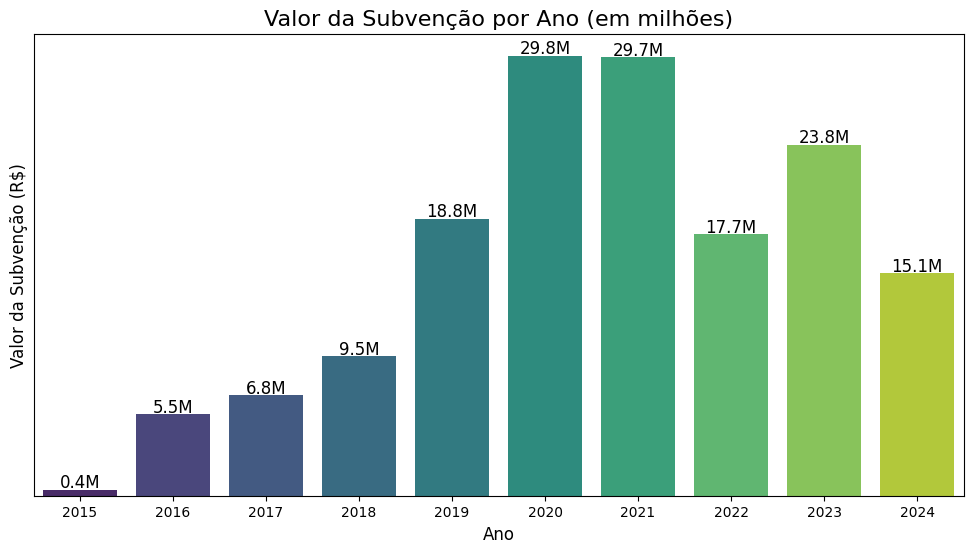

In [11]:
df_valor = df.groupby('Ano')['Valor da Subvenção (R$)'].sum().reset_index()

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Ano', y='Valor da Subvenção (R$)', data=df_valor, palette='viridis')

# Adicionar os valores em cima das barras
for p in ax.patches:
    valor = p.get_height() / 1_000_000  # Converter para milhões
    ax.annotate(f'{valor:,.1f}M',  # Mostrar com 1 casa decimal e "M" para milhões
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black',
                xytext=(0, 5), textcoords='offset points')

# Remover os valores do eixo y
plt.yticks([])

# Adicionar título e labels
plt.title('Valor da Subvenção por Ano (em milhões)', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Valor da Subvenção (R$)', fontsize=12)

# Salvar o gráfico em uma figura
plt.savefig('1_subvencao_ano.png')

## 2. Quantidade de produtos subvencionados por ano

<ipython-input-12-8a3ba2554d38>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Ano', y='Quantidade', data=df_quantidade, palette='viridis')


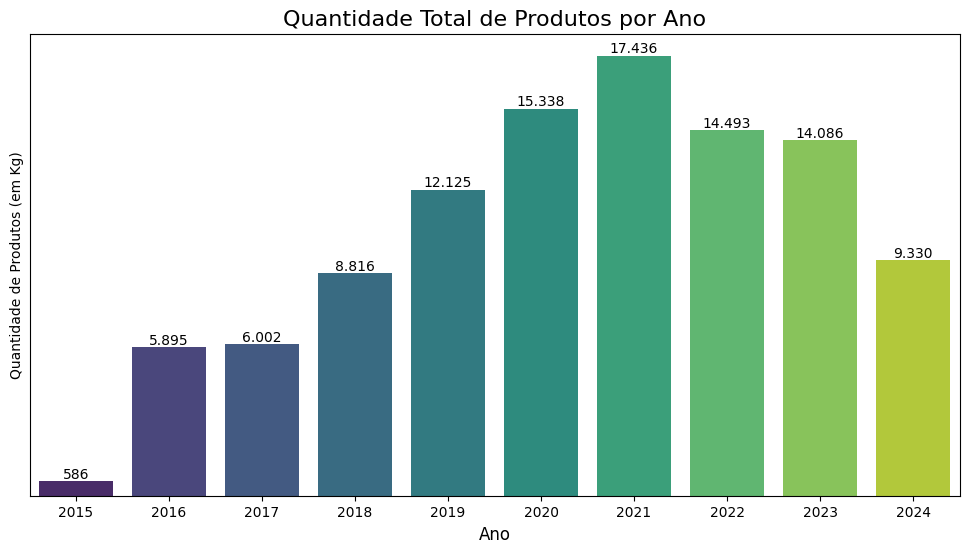

In [12]:
df_quantidade = df.groupby('Ano').size().reset_index(name='Quantidade')

# Criar o gráfico de barras para a quantidade total de produtos por ano
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Ano', y='Quantidade', data=df_quantidade, palette='viridis')

# Adicionar os valores em cima das barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}'.replace(',', '.'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')

# Remover os valores do eixo y
plt.yticks([])

# Adicionar título e labels
plt.title('Quantidade Total de Produtos por Ano', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Quantidade de Produtos (em Kg)')

# Salvar o gráfico como imagem (opcional)
plt.savefig('2_quantidade_produto.png', dpi=300)

## 3. Top 10 produtos subvencionados

<ipython-input-13-02ee010c13bd>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Valor da Subvenção (R$)', y='Produto', data=df_top_10_produtos, palette='viridis', orient='h')
<ipython-input-13-02ee010c13bd>:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f'{x/1_000_000:.1f}M' for x in ax.get_xticks()])


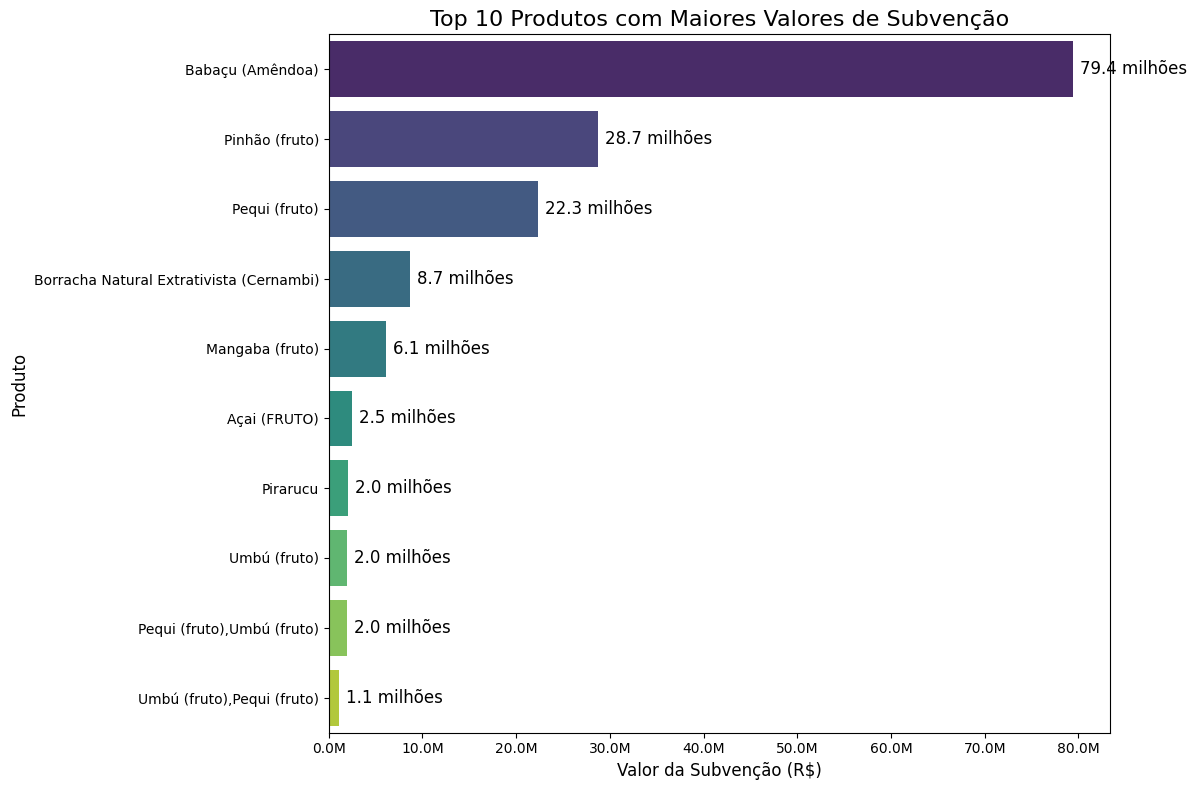

In [13]:
# Agrupar os dados por 'Produto' e somar os valores da coluna 'Valor da Subvenção (R$)'
df_produtos = df.groupby('Produto')['Valor da Subvenção (R$)'].sum().reset_index()

# Ordenar os produtos pelos maiores valores de subvenção (decrescente)
df_produtos = df_produtos.sort_values(by='Valor da Subvenção (R$)', ascending=False)

# Pegar os 10 produtos com os maiores valores de subvenção
df_top_10_produtos = df_produtos.head(10)

# Criar o gráfico de barras horizontais
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Valor da Subvenção (R$)', y='Produto', data=df_top_10_produtos, palette='viridis', orient='h')

# Adicionar os valores em cima das barras formatados em milhões
for p in ax.patches:
    valor_em_milhoes = p.get_width() / 1_000_000  # Dividir o valor por 1 milhão
    valor_formatado = f'{valor_em_milhoes:,.1f} milhões'.replace(',', '.')  # Formatação com ponto
    ax.annotate(valor_formatado,
                (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='left', va='center', fontsize=12, color='black',
                xytext=(5, 0), textcoords='offset points')

# Formatar o eixo x para exibir valores em milhões
ax.set_xticklabels([f'{x/1_000_000:.1f}M' for x in ax.get_xticks()])

# Adicionar título e labels
plt.title('Top 10 Produtos com Maiores Valores de Subvenção', fontsize=16)
plt.xlabel('Valor da Subvenção (R$)', fontsize=12)
plt.ylabel('Produto', fontsize=12)

# Ajuste do layout para evitar corte
plt.tight_layout()

# Salvar o gráfico como imagem (opcional)
plt.savefig('3_subvencao_top10.png')

## 4. Subvenção por UF

Index(['CD_UF', 'NM_UF', 'SIGLA_UF', 'CD_REGIAO', 'NM_REGIAO', 'AREA_KM2',
       'geometry'],
      dtype='object')


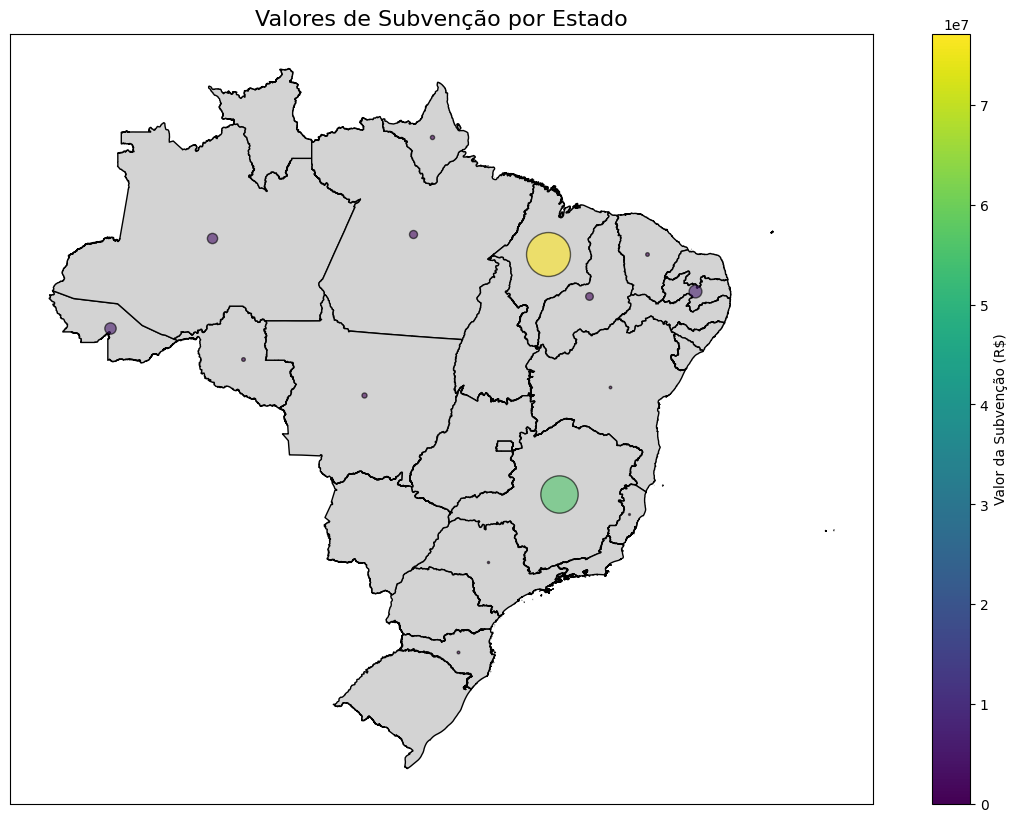

In [14]:
# 1. Calcular a soma dos valores de subvenção por estado
df_uf_subvencao = df.groupby('UF')['Valor da Subvenção (R$)'].sum().reset_index()

# 2. Carregar o shapefile do Brasil
shapefile_path = '/content/BR_UF_2023.shp'

# Carregar o shapefile com GeoPandas
gdf_brasil = gpd.read_file(shapefile_path)

# Verificar as colunas do shapefile para encontrar a coluna das siglas dos estados
print(gdf_brasil.columns)

# Agora, ajuste o nome da coluna das siglas dos estados no merge:
# Supondo que a coluna correta seja 'UF', por exemplo
gdf_brasil = gdf_brasil.merge(df_uf_subvencao, left_on='SIGLA_UF', right_on='UF', how='left')

# 3. Plotar o mapa
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
gdf_brasil.plot(ax=ax, color='lightgrey', edgecolor='black')

# 4. Adicionar as bolinhas representando os valores de subvenção
max_subvencao = df_uf_subvencao['Valor da Subvenção (R$)'].max()
norm = plt.Normalize(0, max_subvencao)
colormap = cm.viridis  # Você pode escolher outra paleta de cores

# Adicionar as bolinhas nos estados
for idx, row in gdf_brasil.iterrows():
    estado = row['SIGLA_UF']
    subvencao = row['Valor da Subvenção (R$)']
    if pd.notnull(subvencao):  # Garantir que o valor não é nulo
        # Calcular a posição do centro do estado (centroide)
        if row['geometry'] is not None:  # Check if geometry is not None
            centroid = row['geometry'].centroid
            x, y = centroid.x, centroid.y

            # Tamanho da bolinha proporcional à subvenção
            size = (subvencao / max_subvencao) * 1000  # Ajuste o fator para controlar o tamanho
            ax.scatter(x, y, s=size, color=colormap(norm(subvencao)), alpha=0.6, edgecolors='black')
        else:
            print(f"Warning: Geometry is None for estado: {estado}") # Print a warning if geometry is None

# 5. Adicionar legenda e títulos
ax.set_title('Valores de Subvenção por Estado', fontsize=16)
ax.set_xlabel('')
ax.set_ylabel('')

plt.yticks([])
plt.xticks([])

# Adicionar a barra de cores (legenda)
sm = plt.cm.ScalarMappable(cmap=colormap, norm=norm)
sm.set_array([])  # Não há dados a serem passados, apenas a normalização
cbar = fig.colorbar(sm, ax=ax)  # Associa a barra de cores ao eixo
cbar.set_label('Valor da Subvenção (R$)')

plt.savefig('4_subvencao_uf.png')

## 5. Subvenção por gênero

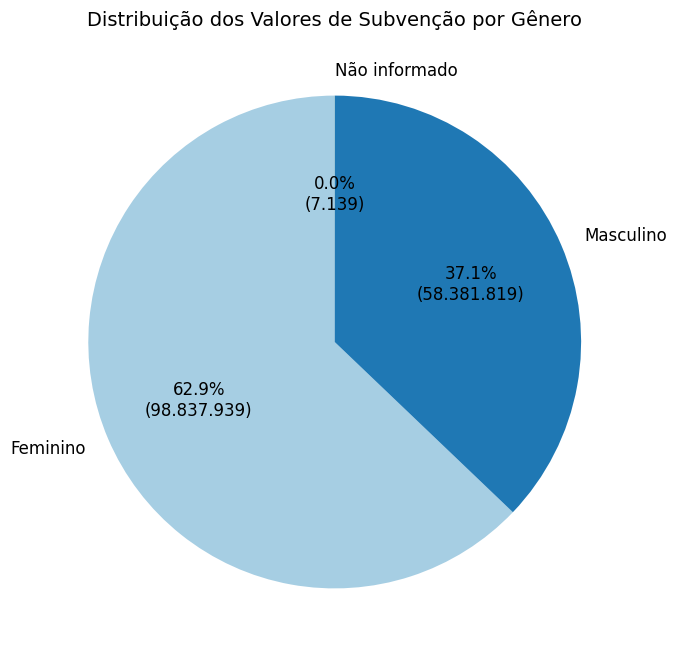

In [15]:
df_genero = df.groupby(['Sexo'])['Valor da Subvenção (R$)'].sum().reset_index()

# Criar o gráfico de pizza
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(
    df_genero['Valor da Subvenção (R$)'],  # Passar apenas a coluna numérica
    labels=df_genero['Sexo'],  # Usar a coluna 'Sexo' para os labels
    autopct=lambda pct: f'{pct:.1f}%\n({(pct/100)*df_genero["Valor da Subvenção (R$)"].sum():,.0f})'.replace(',', '.'), # Calcular porcentagem com base na coluna numérica
    startangle=90,
    colors=plt.cm.Paired.colors,
    textprops={'fontsize': 12}
)

# Adicionar título
ax.set_title('Distribuição dos Valores de Subvenção por Gênero', fontsize=14)

# Salvar o gráfico como imagem
plt.savefig("5_subvencao_genero.png")

## 6. Produtos subvencionados (mulheres)

<ipython-input-16-bde4857f03d6>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Valor da Subvenção (R$)', y='Produto', data=df_top_10_produtos, palette='viridis', orient='h')
<ipython-input-16-bde4857f03d6>:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f'{x/1_000_000:.1f}M' for x in ax.get_xticks()])


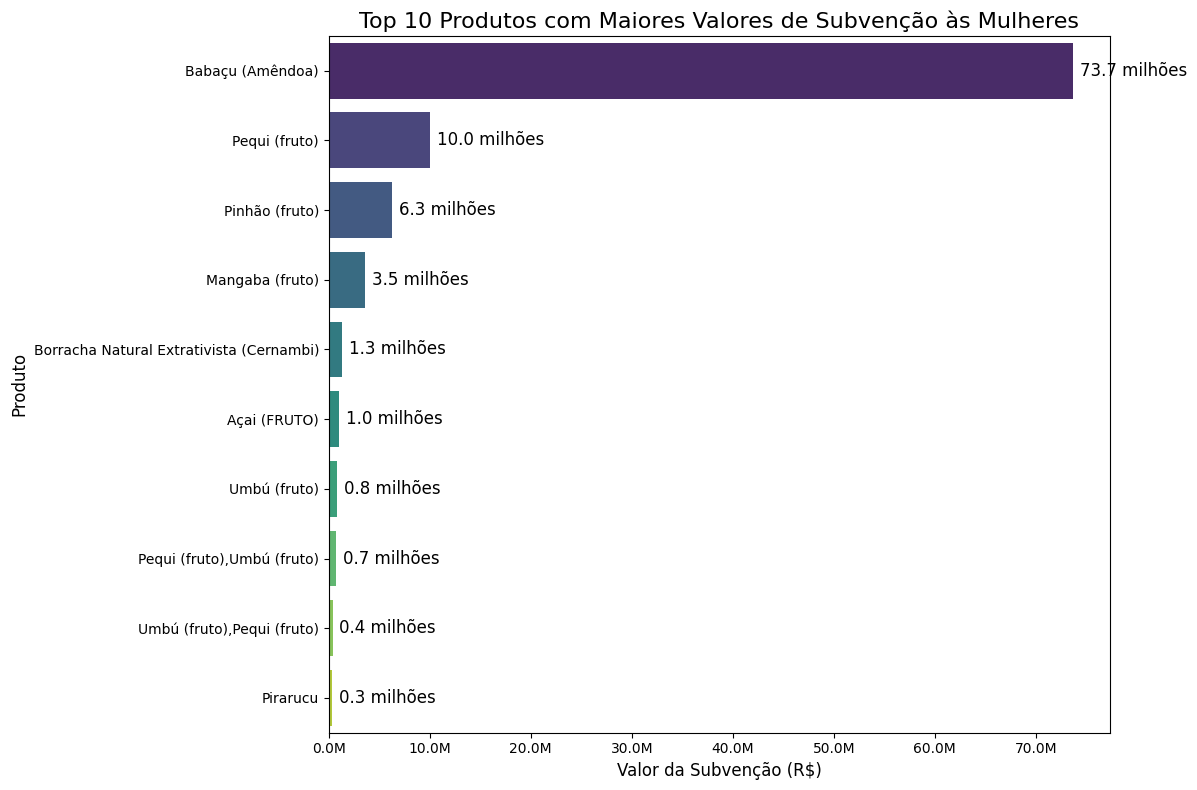

In [16]:
df_mulheres = df[df['Sexo'] == 'Feminino']

# Agrupar os dados por 'Produto' e somar os valores da coluna 'Valor da Subvenção (R$)'
df_produtos_mulheres = df_mulheres.groupby('Produto')['Valor da Subvenção (R$)'].sum().reset_index()

# Ordenar os produtos pelos maiores valores de subvenção (decrescente)
df_produtos_mulheres = df_produtos_mulheres.sort_values(by='Valor da Subvenção (R$)', ascending=False)

# Pegar os 10 produtos com os maiores valores de subvenção
df_top_10_produtos = df_produtos_mulheres.head(10)

# Criar o gráfico de barras horizontais
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Valor da Subvenção (R$)', y='Produto', data=df_top_10_produtos, palette='viridis', orient='h')

# Adicionar os valores em cima das barras formatados em milhões
for p in ax.patches:
    valor_em_milhoes = p.get_width() / 1_000_000  # Dividir o valor por 1 milhão
    valor_formatado = f'{valor_em_milhoes:,.1f} milhões'.replace(',', '.')  # Formatação com ponto
    ax.annotate(valor_formatado,
                (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='left', va='center', fontsize=12, color='black',
                xytext=(5, 0), textcoords='offset points')

# Formatar o eixo x para exibir valores em milhões
ax.set_xticklabels([f'{x/1_000_000:.1f}M' for x in ax.get_xticks()])

# Adicionar título e labels
plt.title('Top 10 Produtos com Maiores Valores de Subvenção às Mulheres', fontsize=16)
plt.xlabel('Valor da Subvenção (R$)', fontsize=12)
plt.ylabel('Produto', fontsize=12)

# Ajuste do layout para evitar corte
plt.tight_layout()

# Salvar o gráfico como imagem (opcional)
plt.savefig('6_subvencao_mulheres.png')

## 7. Subvenção do coco babaçu por gênero

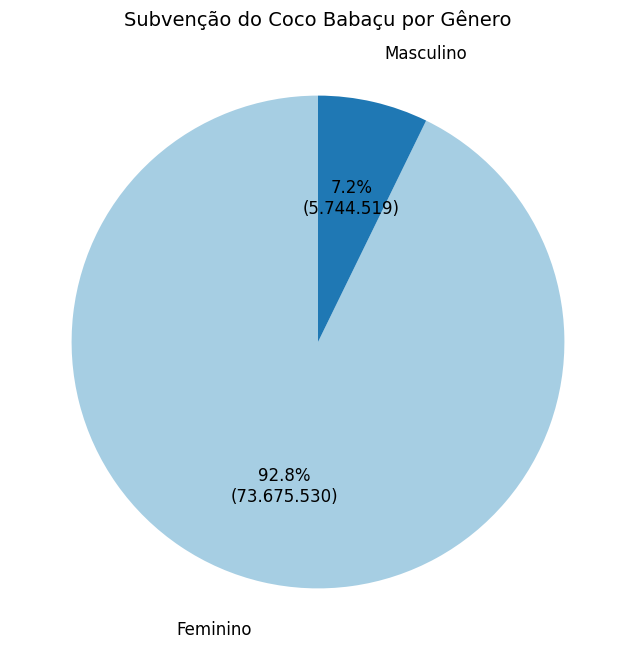

In [17]:
# Filtrar os dados para o produto 'Babaçu (Amêndoa)'
df_babacu = df[df['Produto'] == 'Babaçu (Amêndoa)']

# Filtrar para incluir apenas os gêneros 'Feminino' e 'Masculino'
df_genero_produto = df_babacu[df_babacu['Sexo'].isin(['Feminino', 'Masculino'])]

# Agrupar os dados por gênero e somar os valores da subvenção
df_genero_produto = df_genero_produto.groupby(['Sexo'])['Valor da Subvenção (R$)'].sum().reset_index()

# Garantir que "Feminino" seja o primeiro item
df_genero_produto = df_genero_produto.set_index('Sexo').reindex(['Feminino', 'Masculino']).reset_index()

# Criar o gráfico de pizza
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(
    df_genero_produto['Valor da Subvenção (R$)'],  # Passar apenas a coluna numérica
    labels=df_genero_produto['Sexo'],  # Usar a coluna 'Sexo' para os labels
    autopct=lambda pct: f'{pct:.1f}%\n({(pct/100)*df_genero_produto["Valor da Subvenção (R$)"].sum():,.0f})'.replace(',', '.'), # Calcular porcentagem com base na coluna numérica
    startangle=90,
    colors=plt.cm.Paired.colors,
    textprops={'fontsize': 12},  # Ajuste do tamanho da fonte do texto
    labeldistance=1.2  # Aumentar a distância dos rótulos do centro
)

# Adicionar título
ax.set_title('Subvenção do Coco Babaçu por Gênero', fontsize=14)

# Salvar o gráfico como imagem
plt.savefig("7_babacu_gênero.png")